# TEXT CLASSIFICATION USING NAIVE BAYES CLASSIFIER

_**Classifying text documents using muiltinomial naive Bayes classifier.**_

In [1]:
# Imports required modules, classes and functions

from sklearn.datasets import fetch_20newsgroups
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

## Loading & Analysing Dataset

The dataset being used in this experiment is 20-newsgroups that comprises around 18000+ newsgroups posts across 20 below mentioned categories. 

'alt.atheism',<br>
 'comp.graphics',<br>
 'comp.os.ms-windows.misc',<br>
 'comp.sys.ibm.pc.hardware',<br>
 'comp.sys.mac.hardware',<br>
 'comp.windows.x',<br>
 'misc.forsale',<br>
 'rec.autos',<br>
 'rec.motorcycles',<br>
 'rec.sport.baseball',<br>
 'rec.sport.hockey',<br>
 'sci.crypt',<br>
 'sci.electronics',<br>
 'sci.med',<br>
 'sci.space',<br>
 'soc.religion.christian',<br>
 'talk.politics.guns',<br>
 'talk.politics.mideast',<br>
 'talk.politics.misc',<br>
 'talk.religion.misc'<br>

Though data from all categories are being considered in this experiment, subset of the categies can also be set by having these catogies in a list and passing it in the data loading utility function as shown in the next cell.

In [2]:
# Though data from all categories are being considered in this experiment, data from 
# subset of the categies can also be used by having these catogies in a list and passing
# it in the data loading utility function as shown in the next cell.

""" Remove this block-comment and set categories of interest.

categories=[
    "alt.atheism",
    "comp.graphics",
    "comp.os.ms-windows.misc",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
]

"""


' Remove this block-comment and set categories of interest.\n\ncategories=[\n    "alt.atheism",\n    "comp.graphics",\n    "comp.os.ms-windows.misc",\n    "comp.sys.ibm.pc.hardware",\n    "comp.sys.mac.hardware",\n]\n\n'

In [3]:
# Retrieves the full train set

newsgroups_train = fetch_20newsgroups(
    subset="train", 
    # categories=categories,    # Uncomment this to load data only for the mentioned categories
 
    random_state=42,            # Ensures reproducibility, sets random seed for all operations that rely on randomness

    # as certain words appear more frequently, blocks 'headers', 'signature' and 'quotation' get 
    # removed from each file to avoid overfitting
    remove=('headers', 'footers', 'quotes'), 
    
    return_X_y=False            # To return features values and corresponding targets as seperate entity
    )

In [4]:
# Similarly, retrieves the test subset of the dataset
newsgroups_test = fetch_20newsgroups(
    subset="test",
    # categories=categories,    # Uncomment this to load data only for the mentioned categories
    random_state=42, 
    remove=('headers', 'footers', 'quotes'),     
    return_X_y=False)

In [5]:
# Checks the shape of the full train and test set

print("Number of samples in (full) train set:", len(newsgroups_train.data))

print("Number of samples in test set:", len(newsgroups_test.data))

Number of samples in (full) train set: 11314
Number of samples in test set: 7532


In [6]:
# Checks keys available to access bunch oject's properties
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [7]:
# Prints one sample with target for reference
# Function pprint (pretty-print) instead of standard print is used
# to take care formatting (e.g. linefeed, etc.) while rendering on screen.

pprint({
    "data": newsgroups_train.data[0], 
    "target": newsgroups_train.target_names[newsgroups_train.target[0]]})

{'data': 'I was wondering if anyone out there could enlighten me on this car I '
         'saw\n'
         'the other day. It was a 2-door sports car, looked to be from the '
         'late 60s/\n'
         'early 70s. It was called a Bricklin. The doors were really small. In '
         'addition,\n'
         'the front bumper was separate from the rest of the body. This is \n'
         'all I know. If anyone can tellme a model name, engine specs, years\n'
         'of production, where this car is made, history, or whatever info '
         'you\n'
         'have on this funky looking car, please e-mail.',
 'target': 'rec.autos'}


## Data Preparation

In [8]:
# Further, seperates validation set from the full train set
X_train, X_val, y_train, y_val = train_test_split(
    newsgroups_train.data, newsgroups_train.target, # Full feature values and corresponding targets from full train set
    test_size=0.2,                                  # Seperates 20% from the full train set to be used as validation set
    random_state=42,
    stratify=newsgroups_train.target                # Ensures (near) equal distribution of instances across splits based on classes these instances belong to
    )

In [9]:
# Convert a collection of text documents to a (sparse) matrix of token counts.

countVectorizer = CountVectorizer(
    lowercase=True,         # Converts all characters to lowercase before tokenizing
    stop_words="english",   # Stop words built in a list for English will be removed from the resulting tokens
    analyzer="word"         # For feature to be made of word instead of character
    )

In [10]:
# First fits the Count Vectorizer on the train set and then transforms it
X_train_countvectorized = countVectorizer.fit_transform(X_train)


# Then the same fitted vectorizer transforms both validation and test set

X_val_countvectorized = countVectorizer.transform(X_val)
X_test_countvectorized = countVectorizer.transform(newsgroups_test.data)

In [11]:
# Prints size of the vocabulary
print("Vocabulary size:", len(countVectorizer.vocabulary_))

Vocabulary size: 89984


In [12]:
# Prints shape of the transformed data sets

print("Shape of transformed train set:", X_train_countvectorized.shape)
print("Shape of transformed validation set:", X_val_countvectorized.shape)
print("Shape of transformed test set:", X_test_countvectorized.shape)

Shape of transformed train set: (9051, 89984)
Shape of transformed validation set: (2263, 89984)
Shape of transformed test set: (7532, 89984)


## Modeling

In [13]:
# Considering the fact that datasets contain features with discrete values (e.g. word counts 
# in this experiments) multinomial version of naive Bayes classifier was used for modeling.

# Initializes the model
multi_nb_clf = MultinomialNB(alpha=.01)    # alpha is a hyperparameter for additive smoothing

# Fits the model on (transformed) train set
multi_nb_clf.fit(X_train_countvectorized, y_train)

MultinomialNB(alpha=0.01)

In [14]:
# Performs predictions for all data sets

predictions_train = multi_nb_clf.predict(X_train_countvectorized)
predictions_val = multi_nb_clf.predict(X_val_countvectorized)
predictions_test = multi_nb_clf.predict(X_test_countvectorized)

In [15]:
# Calculates the model's prediction performance over metric F-1 score for all sets

f1_score_train = f1_score(y_train, predictions_train, average="weighted")
f1_score_val = f1_score(y_val, predictions_val, average="weighted")
f1_score_test = f1_score(newsgroups_test.target, predictions_test, average="weighted")


Text(0.5, 1.0, 'Confusion Matrix on Train Set \n (Weighted) F1-Score: 0.89')

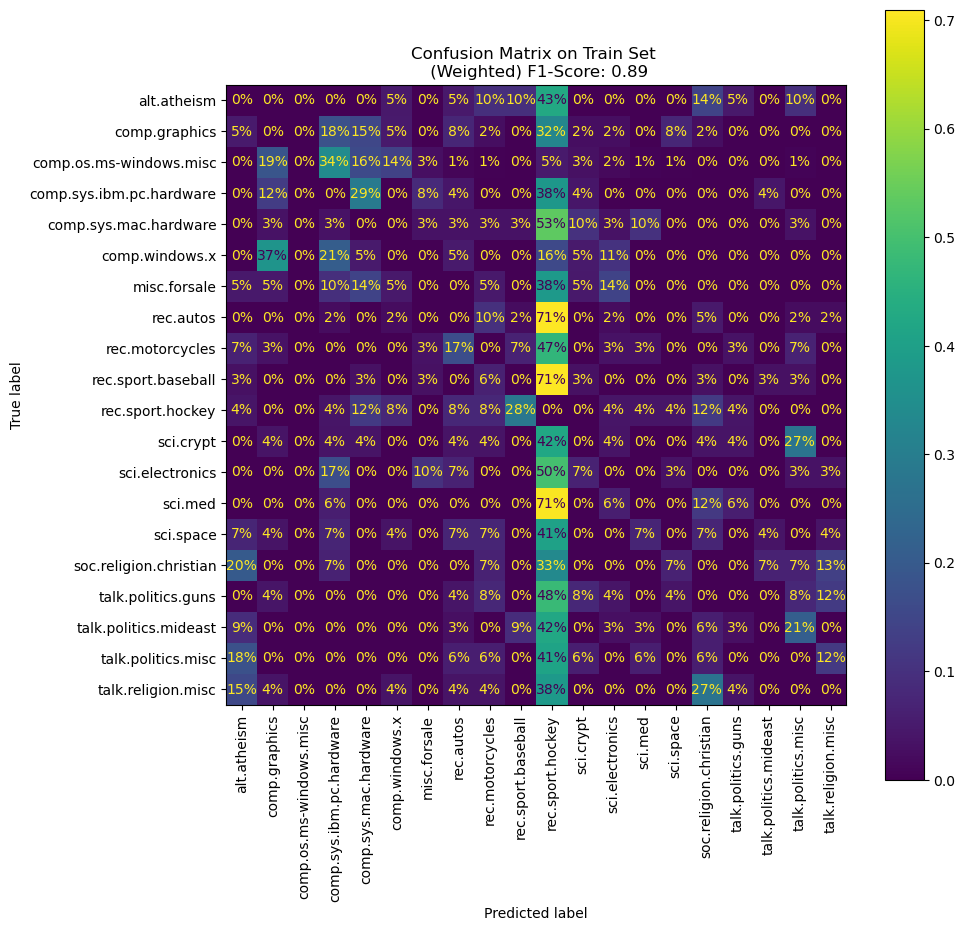

In [16]:
# [OPTIONAL] Plots the confusion matrix for train set

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(
    y_train, predictions_train, 
    sample_weight=(predictions_train != y_train),
    normalize='true',
    display_labels=newsgroups_train.target_names,
    xticks_rotation="vertical",
    values_format=".0%",
    ax=ax)
ax.set_title("Confusion Matrix on Train Set \n (Weighted) F1-Score: {:.2f}".format(f1_score_train))


Text(0.5, 1.0, 'Confusion Matrix on Validation Set \n (Weighted) F1-Score: 0.70')

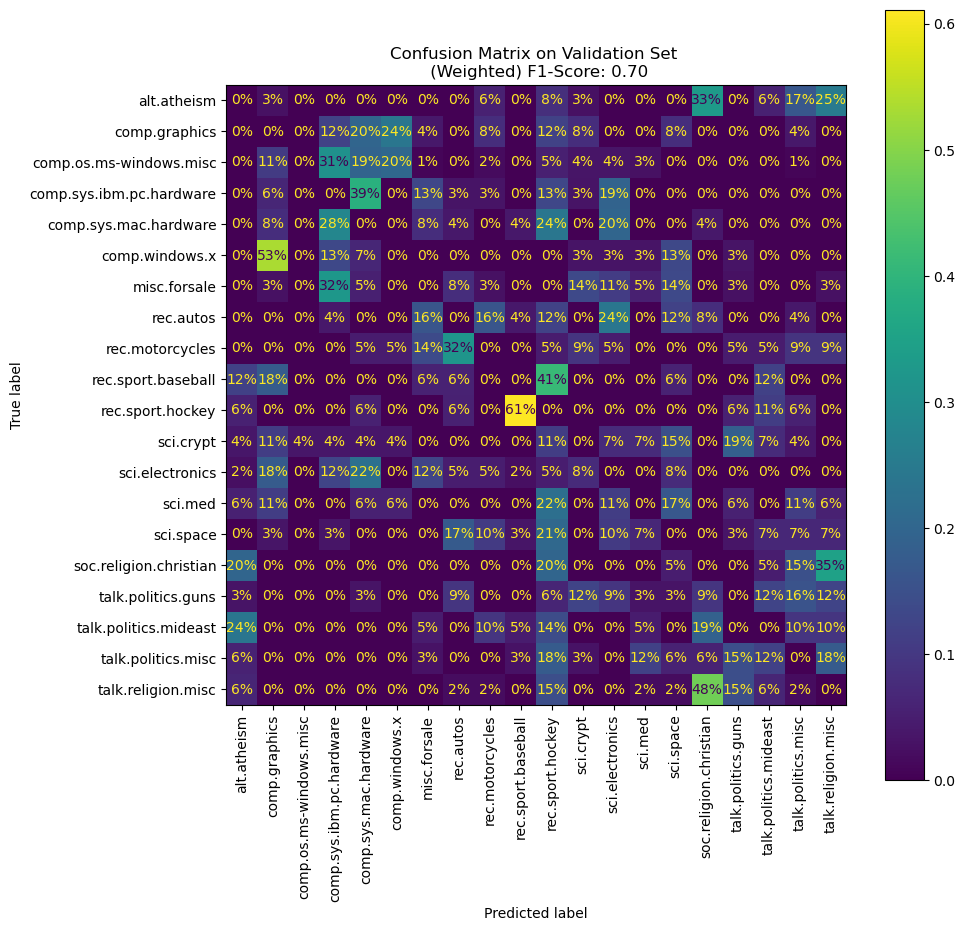

In [19]:
# Plots the confusion matrix for validation set

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(
    y_val, predictions_val, 
    sample_weight=(predictions_val != y_val),
    normalize='true',
    display_labels=newsgroups_train.target_names,
    xticks_rotation="vertical",
    values_format=".0%",
    ax=ax)
ax.set_title("Confusion Matrix on Validation Set \n (Weighted) F1-Score: {:.2f}".format(f1_score_val))


Text(0.5, 1.0, 'Confusion Matrix on Test Set \n (Weighted) F1-Score: 0.62')

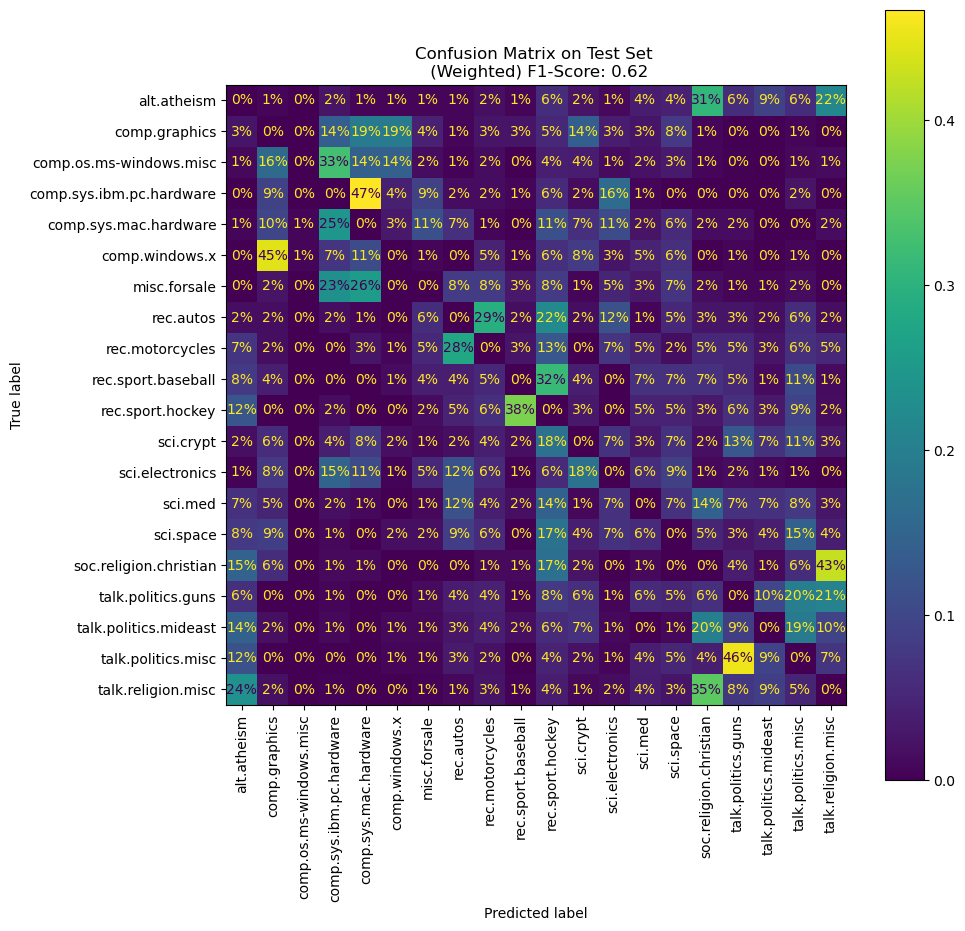

In [20]:
# [OPTIONAL] Plots the confusion matrix for test set

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(
    newsgroups_test.target, predictions_test, 
    sample_weight=(predictions_test != newsgroups_test.target),
    normalize='true',
    display_labels=newsgroups_train.target_names,
    xticks_rotation="vertical",
    values_format=".0%",
    ax=ax)
ax.set_title("Confusion Matrix on Test Set \n (Weighted) F1-Score: {:.2f}".format(f1_score_test))


## Observations

1. Additional natural language processing techniques can be applied to further preprocess in the input string. Such scope is limited here in this expeiment as it is particularly related to applying naive Bayes for classification task.

2. Analysing all confusion metrices, it was realized that the primary reason for lower F1 score on validation and test set is the model's confusion to classify documents of similar categories such as 
- `comp.windows.x` and `comp.graphics`,

- `comp.sys.ibm.pc.hardware` and `comp.sys.mac.hardware`,

- `rec.sport.hockey` and `rec.sport.baseball`, etc.

3. Test set prediction performance with F1-score of 0.62 is much lower than that of the validation set with F1-score 0.70 that in turn is less than that of the train set with F1-score 0.89. It is a clear case for model to be overfitted on the train set. Further analysis and measures can elleviate this problem.
